In [1]:
%load_ext autoreload

%autoreload 2
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn import metrics

# from mlxtend.plotting import plot_decision_regions
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from ast import literal_eval

import warnings
import numpy as np
from collections import OrderedDict

from lob_data_utils import lob, db_result, model, roc_results
from lob_data_utils.svm_calculation import lob_svm
import os


sns.set_style('whitegrid')
warnings.filterwarnings('ignore')

In [2]:
data_length = 10000
rs_params = [(0.1, 1.0)]
stocks = list(roc_results.result_cv_10000.keys())
data_dir = 'res_pca_gdf_que3'

In [3]:
def get_mean_scores(scores: dict) -> dict:
    mean_scores = {}
    for k, v in scores.items():
        mean_scores[k] = np.mean(v)
    return mean_scores

def get_score_for_clf(clf, df_test):
    x_test = df_test[['queue_imbalance']]
    y_test = df_test['mid_price_indicator'].values
    return model.test_model(clf, x_test, y_test)

def get_logistic_regression(stock, data_length):
    df, df_test = lob.load_prepared_data(
        stock, data_dir='../gaussian_filter/data', cv=False, length=data_length)
    clf = LogisticRegression()
    train_x = df[['queue_imbalance']]

    scores = model.validate_model(clf, train_x, df['mid_price_indicator'])
    res = {
        **get_mean_scores(scores),
        'stock': stock,
        'kernel': 'logistic',
    }
    test_scores = get_score_for_clf(clf, df_test)
    return {**res, **test_scores}

In [4]:
df_res = pd.DataFrame()
for stock in stocks:
    for r, s in rs_params:
    #pd.read_csv('svm_features_{}_len{}_r{}_s{}.csv'.format(stock, data_length, r, s))
        filename = data_dir + '/svm_pca_gdf_sigmoid_{}_len{}_r{}_s{}_K20-30.csv'.format(stock, data_length, r, s)
        if os.path.exists(filename):
            df_temp = pd.read_csv(filename)
            df_temp['r'] = [r] * len(df_temp)
            df_temp['s'] = [s] * len(df_temp)
            df_res = df_res.append(df_temp)
#df_res.drop(columns=['Unnamed: 0'], inplace=True)
columns = ['C', 'f1', 'features', 'gamma', 'kappa',
           'matthews', 'roc_auc', 'stock',
       'test_f1', 'test_kappa', 'test_matthews', 'test_roc_auc', 'r', 's']
df_res[columns].sort_values(by='matthews', ascending=False).groupby('stock').head(1)

,C,f1,features,gamma,kappa,matthews,roc_auc,stock,test_f1,test_kappa,test_matthews,test_roc_auc,r,s
18,100.00,0.598487,pca_gdf_20-30_que3,0.01,0.186026,0.187483,0.592958,11946,0.631873,0.206177,0.206632,0.602812,0.1,1.0
19,100.00,0.594206,pca_gdf_20-30_que3,0.01,0.180769,0.181744,0.590610,3879,0.557491,0.110720,0.110767,0.555375,0.1,1.0
3,0.01,0.577268,pca_gdf_20-30_que3,1.00,0.163822,0.165434,0.581899,3035,0.571156,0.099915,0.100004,0.549902,0.1,1.0
19,100.00,0.582613,pca_gdf_20-30_que3,0.01,0.158803,0.160727,0.579712,12417,0.594203,0.160457,0.161201,0.580325,0.1,1.0
19,100.00,0.607421,pca_gdf_20-30_que3,0.01,0.157979,0.158439,0.578960,4320,0.593163,0.153400,0.153441,0.576790,0.1,1.0
18,100.00,0.609690,pca_gdf_20-30_que3,0.01,0.152882,0.154354,0.576188,10484,0.561731,0.109687,0.110031,0.554941,0.1,1.0
19,100.00,0.587724,pca_gdf_20-30_que3,0.01,0.151275,0.153191,0.575764,1956,0.566319,0.126617,0.126645,0.563313,0.1,1.0
18,100.00,0.577667,pca_gdf_20-30_que3,0.01,0.148990,0.151956,0.574677,1472,0.621528,0.113032,0.114679,0.555860,0.1,1.0
19,100.00,0.575127,pca_gdf_20-30_que3,0.01,0.148522,0.149653,0.574542,7858,0.568345,0.159232,0.159324,0.579734,0.1,1.0
6,0.01,0.574131,pca_gdf_20-30_que3,100.00,0.147686,0.148137,0.573914,5836,0.557136,0.096973,0.097143,0.548514,0.1,1.0


In [5]:
log_res = []
for stock in stocks:
    log_res.append(get_logistic_regression(stock, data_length))
df_log_res = pd.DataFrame(log_res)
df_log_res['stock'] = df_log_res['stock'].values.astype(np.int)
df_log_res.index = df_log_res['stock'].values.astype(np.int)

In [6]:
df_gdf_best = df_res[columns].sort_values(by='matthews', ascending=False).groupby('stock').head(1)
df_gdf_best['stock'] = df_gdf_best['stock'].values.astype(np.int)
df_gdf_best.index = df_gdf_best['stock'].values.astype(np.int)

In [7]:
df_all = pd.merge(df_gdf_best, df_log_res, on='stock', suffixes=['_svm', '_log'])

In [8]:
all_columns = ['matthews_svm', 'matthews_log',  'test_matthews_svm',  'test_matthews_log', 
       'roc_auc_svm', 'roc_auc_log', 'test_roc_auc_svm',  'test_roc_auc_log', 'stock' ]
df_all[all_columns]

,matthews_svm,matthews_log,test_matthews_svm,test_matthews_log,roc_auc_svm,roc_auc_log,test_roc_auc_svm,test_roc_auc_log,stock
0,0.187483,0.186824,0.206632,0.203627,0.592958,0.592373,0.602812,0.601087,11946
1,0.181744,0.178656,0.110767,0.120812,0.590610,0.588843,0.555375,0.560288,3879
2,0.165434,0.167115,0.100004,0.099310,0.581899,0.583085,0.549902,0.549537,3035
3,0.160727,0.150172,0.161201,0.154446,0.579712,0.573432,0.580325,0.576707,12417
4,0.158439,0.156657,0.153441,0.163789,0.578960,0.577752,0.576790,0.581178,4320
5,0.154354,0.158982,0.110031,0.103611,0.576188,0.578350,0.554941,0.551208,10484
6,0.153191,0.152838,0.126645,0.133788,0.575764,0.574598,0.563313,0.566273,1956
7,0.151956,0.148600,0.114679,0.118223,0.574677,0.572888,0.555860,0.557251,1472
8,0.149653,0.146384,0.159324,0.171235,0.574542,0.572852,0.579734,0.584512,7858
9,0.148137,0.141480,0.097143,0.138012,0.573914,0.570374,0.548514,0.568830,5836


In [9]:
df_all['matthews_diff'] = df_all['matthews_svm'] -  df_all['matthews_log']
df_all['matthews_test_diff'] = df_all['test_matthews_svm'] - df_all['test_matthews_log']

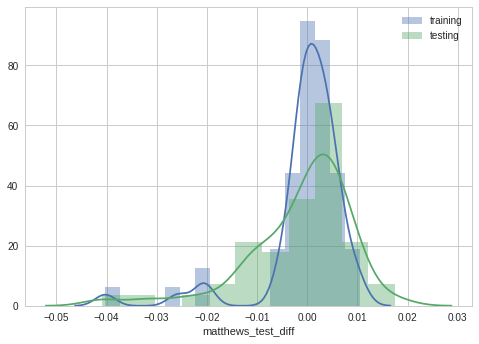

In [10]:
sns.distplot(df_all['matthews_diff'], label='training')
sns.distplot(df_all['matthews_test_diff'], label='testing')
plt.legend()

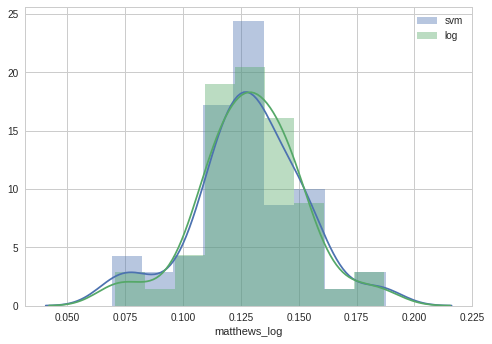

In [11]:
sns.distplot(df_all['matthews_svm'], label='svm')
sns.distplot(df_all['matthews_log'], label='log')
plt.legend()

In [12]:
df_all['matthews_diff'].sum(), df_all['matthews_test_diff'].sum()

(-0.023345167211103537, -0.07600967668819403)

In [13]:
len(df_all[df_all['matthews_svm'] > df_all['matthews_log']][all_columns]), len(df_all[df_all['test_matthews_svm'] > df_all['test_matthews_log']]), len(df_all)

(32, 31, 53)

In [14]:
df_all[df_all['test_matthews_svm'] < df_all['test_matthews_log']][all_columns]

,matthews_svm,matthews_log,test_matthews_svm,test_matthews_log,roc_auc_svm,roc_auc_log,test_roc_auc_svm,test_roc_auc_log,stock
1,0.181744,0.178656,0.110767,0.120812,0.590610,0.588843,0.555375,0.560288,3879
4,0.158439,0.156657,0.153441,0.163789,0.578960,0.577752,0.576790,0.581178,4320
6,0.153191,0.152838,0.126645,0.133788,0.575764,0.574598,0.563313,0.566273,1956
7,0.151956,0.148600,0.114679,0.118223,0.574677,0.572888,0.555860,0.557251,1472
8,0.149653,0.146384,0.159324,0.171235,0.574542,0.572852,0.579734,0.584512,7858
9,0.148137,0.141480,0.097143,0.138012,0.573914,0.570374,0.548514,0.568830,5836
14,0.144211,0.142499,0.157333,0.162155,0.571569,0.570582,0.578544,0.580693,10508
17,0.134285,0.136666,0.082406,0.096997,0.566538,0.567394,0.541166,0.547942,4060
19,0.133376,0.138016,0.126551,0.138375,0.566477,0.568685,0.563240,0.568627,1431
21,0.132998,0.131165,0.117008,0.122536,0.566142,0.564884,0.557721,0.558425,8080


In [15]:
len(df_all[df_all['roc_auc_svm'] > df_all['roc_auc_log']][all_columns]), len(df_all[df_all['test_roc_auc_svm'] > df_all['test_roc_auc_log']][all_columns]), len(df_all)

(33, 31, 53)

In [16]:
df_all[df_all['test_matthews_svm'] < df_all['test_matthews_log']][all_columns]

,matthews_svm,matthews_log,test_matthews_svm,test_matthews_log,roc_auc_svm,roc_auc_log,test_roc_auc_svm,test_roc_auc_log,stock
1,0.181744,0.178656,0.110767,0.120812,0.590610,0.588843,0.555375,0.560288,3879
4,0.158439,0.156657,0.153441,0.163789,0.578960,0.577752,0.576790,0.581178,4320
6,0.153191,0.152838,0.126645,0.133788,0.575764,0.574598,0.563313,0.566273,1956
7,0.151956,0.148600,0.114679,0.118223,0.574677,0.572888,0.555860,0.557251,1472
8,0.149653,0.146384,0.159324,0.171235,0.574542,0.572852,0.579734,0.584512,7858
9,0.148137,0.141480,0.097143,0.138012,0.573914,0.570374,0.548514,0.568830,5836
14,0.144211,0.142499,0.157333,0.162155,0.571569,0.570582,0.578544,0.580693,10508
17,0.134285,0.136666,0.082406,0.096997,0.566538,0.567394,0.541166,0.547942,4060
19,0.133376,0.138016,0.126551,0.138375,0.566477,0.568685,0.563240,0.568627,1431
21,0.132998,0.131165,0.117008,0.122536,0.566142,0.564884,0.557721,0.558425,8080


In [17]:
df_all[df_all['test_roc_auc_svm'] < df_all['test_roc_auc_log']][all_columns]

,matthews_svm,matthews_log,test_matthews_svm,test_matthews_log,roc_auc_svm,roc_auc_log,test_roc_auc_svm,test_roc_auc_log,stock
1,0.181744,0.178656,0.110767,0.120812,0.590610,0.588843,0.555375,0.560288,3879
4,0.158439,0.156657,0.153441,0.163789,0.578960,0.577752,0.576790,0.581178,4320
6,0.153191,0.152838,0.126645,0.133788,0.575764,0.574598,0.563313,0.566273,1956
7,0.151956,0.148600,0.114679,0.118223,0.574677,0.572888,0.555860,0.557251,1472
8,0.149653,0.146384,0.159324,0.171235,0.574542,0.572852,0.579734,0.584512,7858
9,0.148137,0.141480,0.097143,0.138012,0.573914,0.570374,0.548514,0.568830,5836
14,0.144211,0.142499,0.157333,0.162155,0.571569,0.570582,0.578544,0.580693,10508
17,0.134285,0.136666,0.082406,0.096997,0.566538,0.567394,0.541166,0.547942,4060
19,0.133376,0.138016,0.126551,0.138375,0.566477,0.568685,0.563240,0.568627,1431
21,0.132998,0.131165,0.117008,0.122536,0.566142,0.564884,0.557721,0.558425,8080
